# Supervised Learning: Logistic Regression

- Overview

In this section we will be learning about logistic regression. In this section we will be using Logistic Regression to perform classification of a data set. In this lecture, we will focus on binary 
classification, so that we have two outputs, a positive and negative, (1 or 0). To give some examples of what we mean by binary: we could classify email as either spam or not spam, or tumors as either 
malignant or benign. In both these cases we have a set of data and features, but only two possible 
outputs. It is possible to have more than just two classes, but for now we will focus on binary 
classification.

In order to perform this classification we will be using the logistic function to perform logistic 
regression.

Here is an overview of what we will do throughout this lecture:

1. Basic Mathematical Overview of the Logistic Function

2. Extra Math Resources

3. DataSet Analysis

4. Data Visualization

5. Data Preparation

6. Multicollinearity Consideration

7. Logistic Regression with SciKit Learn

8. Testing and Training Data Sets

9. Conclusion and More Resources

Now we'll start with our imports before continuing the lecture (this is because we want to plot some 
things in our explanation).



IMPORTS

Module Install Notice!
You'll need to install a new module we haven't used before: Statsmodels.

You can install it with 'pip install statsmodels' or 'conda install statsmodels' depending on your Python installation. In this lecture we will only be using a dataset from it, but it can do quite a bit, 
including many statistical computations that SciKit Learn does.

In [1]:
# Data Imports 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math Imports
import math

# Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML(machine learning) results
from sklearn import metrics

# Dataset Import 
import statsmodels.api as sm

# Jupyter Notebook: Setting up display area to show DataFrame in Jupyter Console
pd.set_option('display.height',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

from IPython.display import display

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Part 1: Basic Mathematical Overview

First, let's take a look at the Logistic Function. The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined 
as:

σ(t) = 1/(1 + e^−t)

A graph of the logistic function looks like this (following code):

Text(0.5,1,'Logistic Function')

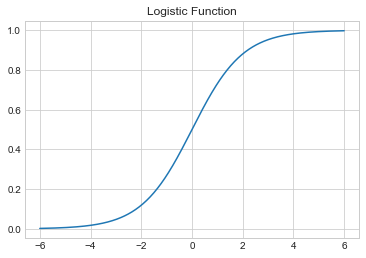

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0) * t))

# Set t from -6 to 6 (500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title('Logistic Function')

# Part 2: Extra Math Resources

This is a very basic overview of binary classification using Logistic Regression, if you're still interested in a deeper dive into the mathematics, check out these sources:

1.) Andrew Ng's class notes on Logistic Regression (Note: Scroll down)
url = http://cs229.stanford.edu/notes/cs229-notes1.pdf

2.) CMU notes Note: Advanced math notation.
url = http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

3.) Wikipedia has a very extensive look at logistic regression.
url = https://en.wikipedia.org/wiki/Logistic_regression

Scroll down to the bottom for more resources similar to this lecture!

# Part 3: Dataset Analysis

Let us go ahead and take a look at the dataset

The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook 
magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

It is important to note that this data comes from a self-reported survey, which can have many issues as 
far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women 
or marriage, the data is just interesting but its accuracy should be met with a healthy dose of 
skepticism.

We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.

In this case we will approach this as a classification problem by asking the question:

Given certain variables for each woman, can we classify them as either having particpated in an affair, 
or not participated in an affair?

DataSet Description:

From the Statsmodels website we have the following information about the data:

Number of observations: 6366 Number of variables: 9 Variable name definitions:

rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                4 = good, 5 = very good

age             : Age

yrs_married     : No. years married. Interval approximations. See
                original paper for detailed explanation.

children        : No. children

religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                4 = strongly

educ            : Level of education, 9 = grade school, 12 = high
                school, 14 = some college, 16 = college graduate,
                17 = some graduate school, 20 = advanced degree

occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                or unskilled worker; 3 = white-colloar; 4 = teacher
                counselor social worker, nurse; artist, writers;
                technician, skilled worker, 5 = managerial,
                administrative, business, 6 = professional with
                advanced degree

occupation_husb : Husband's occupation. Same as occupation.

affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Why a Statsmodels data set? So you can have the option of working through additional example datasets 
included in SciKit Learn and their own tutorials.

# Part 4: Data Visualization

Now that we've done a quick overview of some math and the data we will be working with, let's go ahead 
and dive into the code!

We will start with loading the data and visualizing it.

In [3]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name 'fair' stands for 'affair'
# dataset.
df = sm.datasets.fair.load_pandas().data

In [4]:
# Preview the dataframe
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Great! Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will 
set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 
'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [5]:
# Create a check function to check to affairs column
def affair_check(x):
    if x != 0:
        return 1
    else: 
        return 0

In [6]:
# Create a new column 'Had_Affair' and apply the results of the check function to this column
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [7]:
# Let's see the result and check the dataframe
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


Now let's go ahead and groupby the newly created 'Had_Affair' column. We'll do this by grouping by the 
column and then calling the mean aggregate function.

In [8]:
# Groupby 'Had_Affair' column
# NOTE: Like SQL, using the groupby function requires use of an aggregate function as well, in this case, .mean()
df.groupby(['Had_Affair'],as_index=True).mean()



,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,
married longer, and slightly less religious and less educated. However, the mean values of both classes 
are very close for all variables.

Let's go ahead and try to visualize some of this data.

First some histograms.

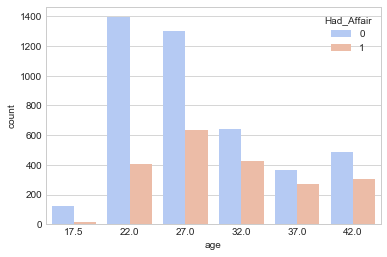

In [9]:
# Countplot (Factorplot) for age with 'Had Affair' hue
sns.countplot('age',data=df,hue='Had_Affair',palette='coolwarm')

This suggests a higher probability of an affair as age increases. Let's check the number of years 
married.

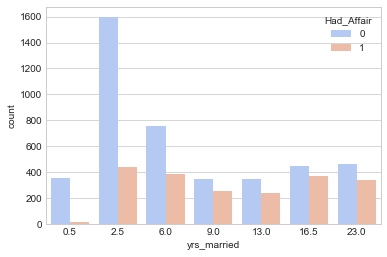

In [10]:
# Countplot (Factorplot) for years married with 'Had_Affair' hue
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

Looks like probability of having an affair increases with the number of years married. Let's check the 
number of children.

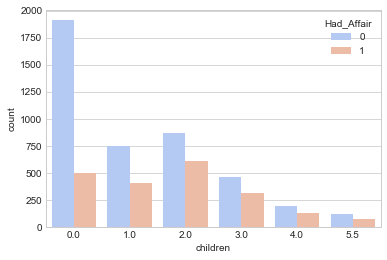

In [11]:
# Countplot (Factorplot) for the number of children they had with 'Had_Affair' hue
sns.countplot('children',data=df,hue='Had_Affair',palette='coolwarm')

Pretty strong evidence suggesting that less children results in a lower probability of an affair. Finally let's check the education level.

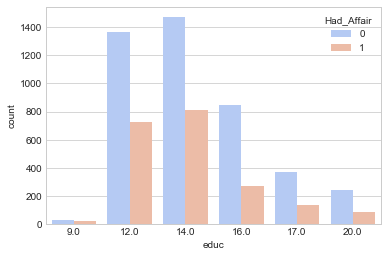

In [12]:
# Countplot (Factorplot) for education level with 'Had_Affair' hue
sns.countplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

Interesting! Go ahead and finish the remaining columns if you wish. For now, we will go ahead and begin 
diving into the Logistic Regression Analysis.

# Part 5: Data Preparation

If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's 
Occupation. These columns are in a format know as Categorical Variables. Basically they are in set 
quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy 
variables and creating new columns from them. You can find the url below.

In [13]:
url = 'https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29'

In [14]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [15]:
# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [16]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


Great! Now let's name the columns something a little more readable.

In [17]:
# Create column names for the new dataframes
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

Now we will create the X and Y data sets for out logistic regression!

In [18]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [20]:
# Concatenate the dummy dataframes together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

Now we will concatenate all the DataFrames together.

In [21]:
# Now concatenate the X dataframe with the dummy variables
X = pd.concat([X,dummies],axis=1)

In [22]:
# Preview of the result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


Now let's go ahead and set up the Y.

In [23]:
# Set Y as Target class, 'Had_Affair'
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

# Part 6: Multicollinearity Consideration.

Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid multicollinearity. Multicollinearity 
occurs due to the dummy variables) we created. This is because the dummy variables are highly correlated, our model begins to get 
distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of 
the dummy variables from each set, we do this at the cost of losing a data set point.

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [231]:
multicollinearity_url = 'https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity'

In [232]:
dummy_var_url2 = 'https://en.wikipedia.org/wiki/Dummy_variable_(statistics'

In [24]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y Target makes sense(its a duplicate of the 'Had_Affair' column)
X = X.drop('affairs',axis=1)

In [25]:
# Preview our dropped changes
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a 
built-in method for this called ravel. Let's use it!

In [26]:
ravel_url = 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html'

In [27]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [28]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0])

# Part 7: Logistic Regression with SciKit Learn

Awesome! Now let's go ahead and run the logistic regression. This is a very similar process to the Linear Regression from the previous 
lecture. We'll create the model, the fit the data into the model, and check our accuracy score. Then we'll split the data into testing 
and training sets and see if our results improve.

Let's start by initiating the model!

In [29]:
# Create LogisticRegression model object
log_model = LogisticRegression()

# Fit our data into that object
log_model.fit(X,Y)

# Check your accuracy
log_model.score(X,Y)

0.7258875274897895

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. 
This is known as checking the null error rate.

In [30]:
null_error_rate_url = 'https://en.wikipedia.org/wiki/Type_I_and_type_II_errors'

In [31]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are 
doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors of likelihood of an affair.

In [32]:
# Use zip to bring the column names and Numpy's .T(transpose/pivot) function to bring together the coefficients from the model
# coeff_df = DataFrame(zip(X.columns,(log_model.coef_)))
coeff_df = pd.DataFrame(log_model.coef_,columns=X.columns).T


In [33]:
# Re-setting index b/c unique values [0,1,2...] was not present. Not sure how to get rid of the index in column though... maybe have to rename
coeff_df.reset_index()

,index,0
0,rate_marriage,-0.697946
1,age,-0.056383
2,yrs_married,0.103906
3,children,0.018074
4,religious,-0.368571
5,educ,0.008599
6,occ2,0.296388
7,occ3,0.605970
8,occ4,0.345116
9,occ5,0.940982


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative 
coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the 
baseline occupation we dropped (1-Student).

# Part 8: Testing and Training Data Sets

Just like we did in the Linear Regression Lecture, we should be splitting our data into training and testing data sets. We'll follow a very similar 
procedure to the Linear Regression Lecture by using SciKit Learn's built-in train_test_split method.

In [284]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit our new model
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we can use predict to predict classification labels for the next test set, then we will reevaluate our accuracy score!

In [285]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes using SciKit's metrics library, calling the accuracy_score method
print(metrics.accuracy_score(Y_test,class_predict))

0.7154522613065326


Now we have a 71.54% accuracy score, which is basically the same as our previous accuracy score, 72.58%.

# Part 9: Conclusion and more Resources

So what could we do to try to further improve our Logistic Regression model? We could try some regularization techniques or using a non-linear model.

Regularization url = https://en.wikipedia.org/wiki/Regularization_%28mathematics%29#Regularization_in_statistics_and_machine_learning

I'll leave the Logistic Regression topic here for you to explore more possibilites on your own. Here are several more resources and tutorials with other 
data sets to explore:

1.) Here's another great post on how to do logistic regression analysis using Statsmodels from yhat!

Yhat url = http://blog.yhat.com/posts/logistic-regression-and-python.html

2.) The SciKit learn Documentation includes several examples at the bottom of the page.

Examples url = http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

3.) DataRobot has a great overview of Logistic Regression

Logistic Regression url = https://blog.datarobot.com/classification-with-scikit-learn

4.) Fantastic resource from aimotion.blogspot on the Logistic Regression and the Mathmatics of how it relates to the cost function and gradient!

AImotion url = http://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html